In [5]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [7]:
medical_df = pd.read_csv('insurance.csv')

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='distribution of age')
fig.update_layout(bargap = 0.1)
fig.show()


In [10]:
fig = px.histogram(medical_df,x ='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'] ,
                   title='distribution of bmi  '
                   )
fig.update_layout(bargap = 0.1)

fig.show()

In [11]:
fig = px.histogram(medical_df,
                   x ='charges',
                   color='smoker',
                   
                   marginal='box',
                   title='annual medical charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
px.histogram(medical_df, x= 'smoker' , color= 'sex', title='smoker')

In [14]:
fig = px.scatter(medical_df,x= 'age' ,y = 'charges', color = 'smoker', opacity  = 0.8
                , hover_data = ['sex'], title='age vs charges')
fig.update_traces(marker_size = 5)
fig.show()

In [15]:
fig = px.scatter(medical_df,x= 'bmi' ,y = 'charges', color = 'smoker', opacity  = 0.8
                , hover_data = ['sex'],color_discrete_sequence=['blue' ,'green'], title='bmi vs charges')
fig.update_traces(marker_size = 5)
fig.show()

In [16]:
px.violin(medical_df,x='children', y= 'charges')

In [17]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [18]:
medical_df.charges.corr(medical_df.children)

0.06799822684790477

In [19]:
smoker_values = {'no' : 0 , 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [20]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984773

In [21]:
medical_df.corr()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_9092\4290363667.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_9092\3434155598.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'correlation matrix')

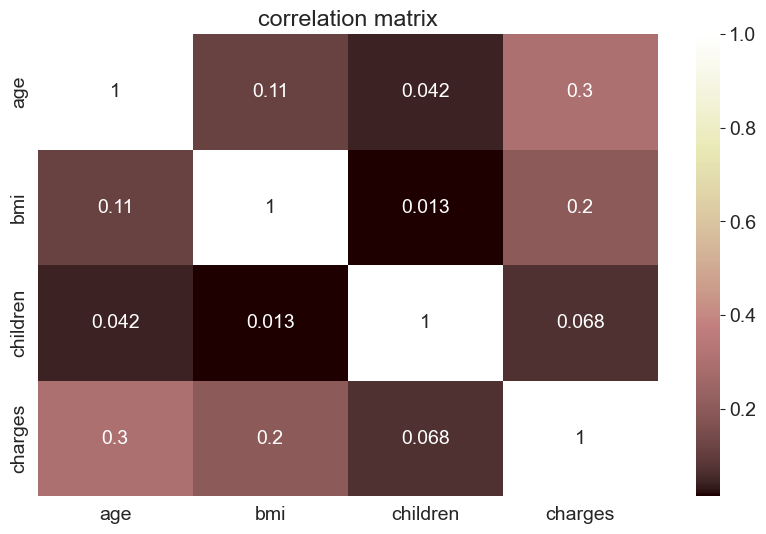

In [22]:
sns.heatmap(medical_df.corr(), cmap = 'pink', annot=True)
plt.title('correlation matrix')

In [23]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

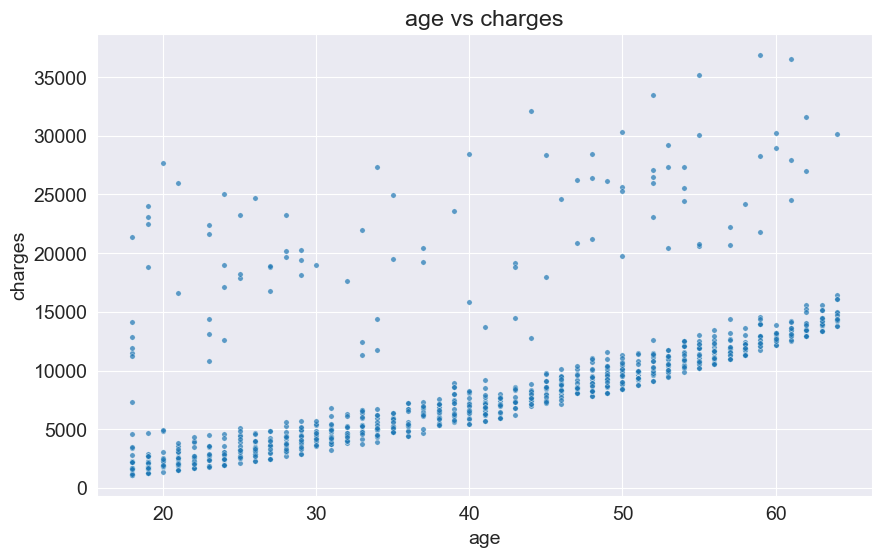

In [24]:
plt.title('age vs charges')
sns.scatterplot(data = non_smoker_df, x= 'age' ,y = 'charges' ,alpha = 0.7 , s =15);

In [25]:
def estimate_charges(age ,w,b) :
    return w*age+b 

In [26]:
w =50
b = 100

In [27]:
estimate_charges(40,w,b)

2100

In [28]:
ages =non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [29]:
estimated_charges = estimate_charges(ages,w,b)


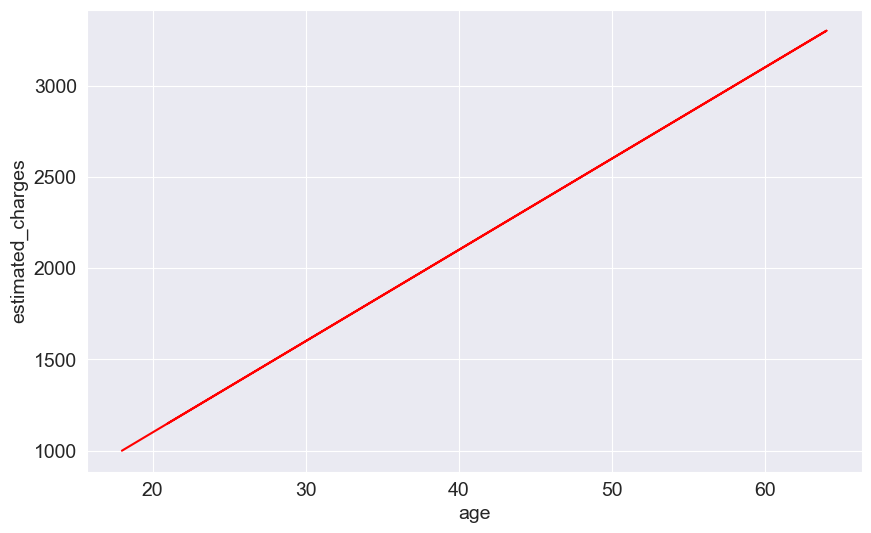

In [30]:
plt.plot(ages, estimated_charges , 'r-')
plt.xlabel('age');
plt.ylabel('estimated_charges');

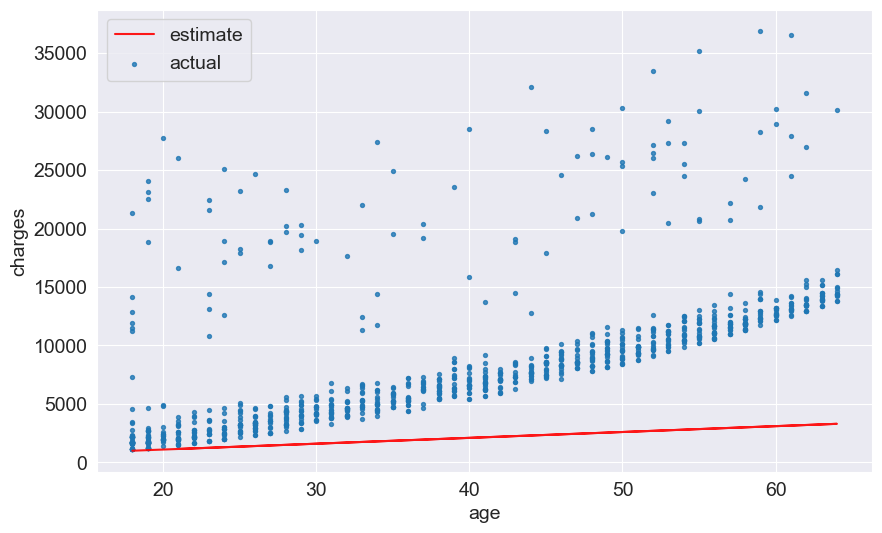

In [31]:
target = non_smoker_df.charges
plt.plot(ages ,estimated_charges, 'r' , alpha = 0.9 );
plt.scatter(ages, target , s=8 ,alpha=0.8);
plt.xlabel('age');
plt.ylabel('charges');
plt.legend(['estimate','actual']);


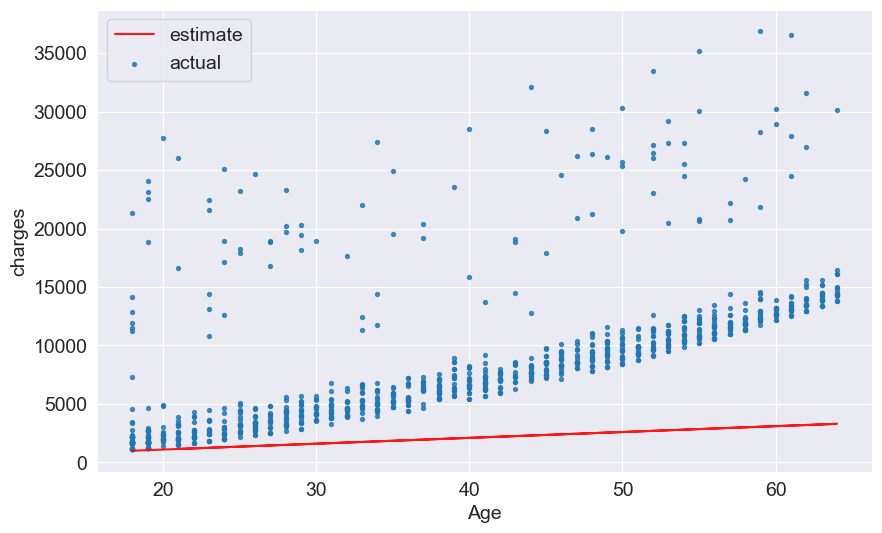

In [32]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages ,w ,b)
    
plt.plot(ages ,estimated_charges, 'r' , alpha=0.9 );
plt.scatter(ages, target , s=8 ,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('charges');
plt.legend(['estimate','actual']);

In [33]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [34]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [35]:
import numpy as np

In [36]:
def rmse(target,predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [37]:
def try_parameters(w , b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages , w ,b)
    plt.plot(ages , predictions , 'r' , alpha = 0.9);
    plt.scatter(ages , target , s=8 ,alpha = 0.8);
    plt.xlabel('Age');
    plt.ylabel('charges');
    plt.legend(['predication','actual']);
    loss = rmse(target, predictions)
    print("RMSE loss:",loss)
    
    


RMSE loss: 8461.949562575493


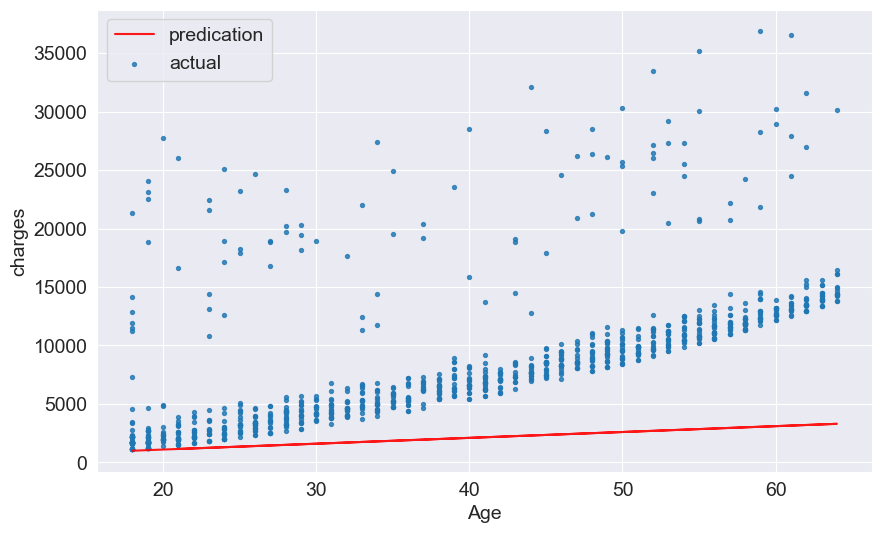

In [38]:
try_parameters(50,100)

RMSE loss: 6863.80091606946


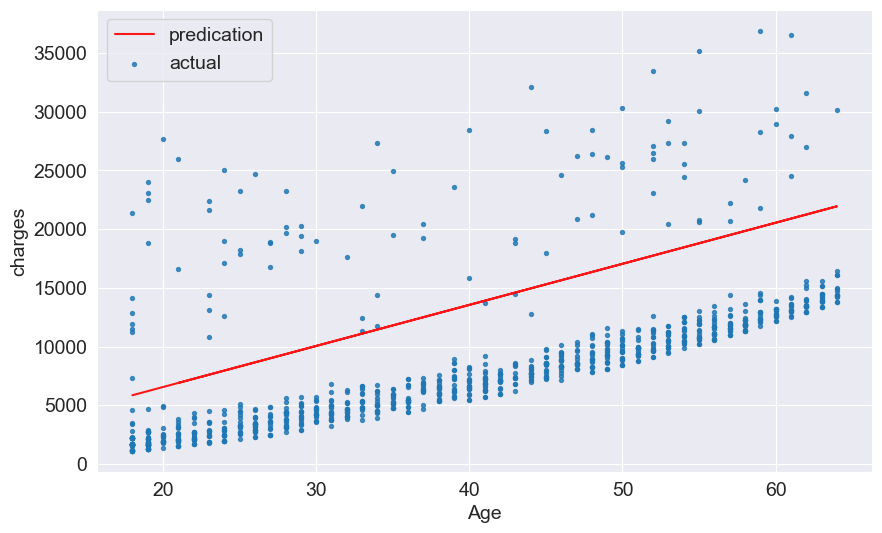

In [39]:
try_parameters(350,-450)

RMSE loss: 4757.076971108113


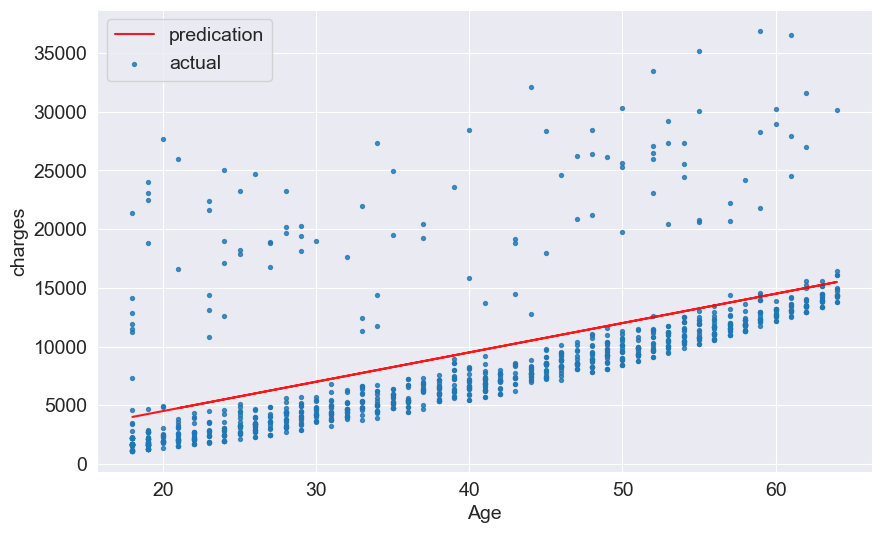

In [40]:
try_parameters(250 , -500)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [44]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :' , targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [45]:
model.fit(inputs,targets)

LinearRegression()

In [46]:
model.predict([[23],[37] ,[61]])

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [47]:
predictions = model.predict(inputs)

In [48]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [49]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [50]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [51]:
rmse(targets,predictions)

4662.505766636395

In [52]:
model.coef_

array([267.24891283])

In [53]:
model.intercept_

-2091.4205565650864

RMSE loss: 4662.505766636395


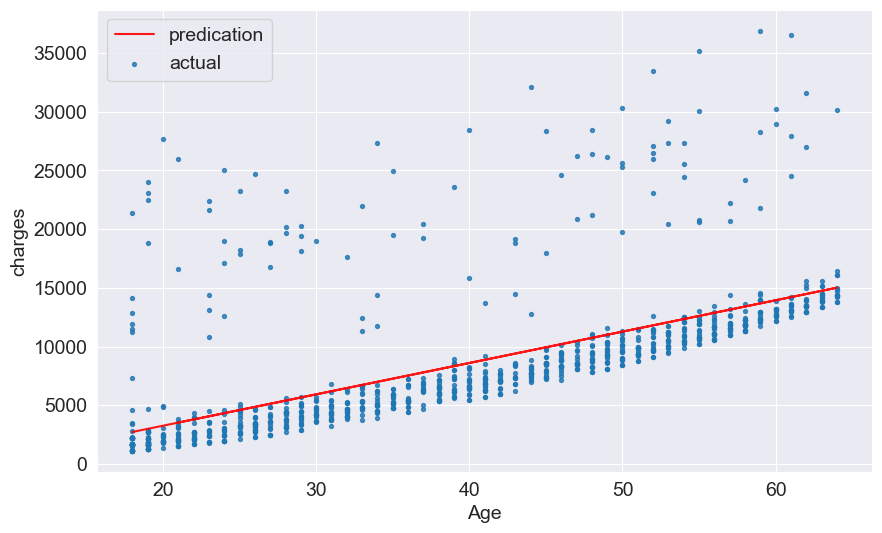

In [54]:
try_parameters(model.coef_ ,model.intercept_)